In [96]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
ath = pd.read_csv('basicAthlete.csv')
ath.drop(['Unnamed: 0'], axis=1, inplace=True)
ath.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,DNW


## Section 1

In [98]:
onlyF = ath[~ath.Sex.str.contains("M")]
onlyF.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",DNW
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,DNW


In [99]:
onlyM = ath[~ath.Sex.str.contains('F')]
onlyM.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,DNW


In [100]:
winter = ath[~ath.Season.str.contains("Summer")]
winter.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",DNW
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,DNW


In [101]:
winter.shape

(48564, 14)

In [102]:
summer = ath[~ath.Season.str.contains("Winter")]
summer.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,DNW


In [103]:
summer.shape

(222552, 14)

In [104]:
summerF = summer[~summer.Sex.str.contains('M')]
winterF = winter[~winter.Sex.str.contains('M')]

In [105]:
sumEvents = pd.crosstab(summer['Year'], summer['Event'])
sumEvents.head(3)

Event,Aeronautics Mixed Aeronautics,Alpinism Mixed Alpinism,"Archery Men's Au Chapelet, 33 metres","Archery Men's Au Chapelet, 50 metres","Archery Men's Au Cordon Dore, 33 metres","Archery Men's Au Cordon Dore, 50 metres",Archery Men's Championnat Du Monde,Archery Men's Continental Style,Archery Men's Double American Round,Archery Men's Double York Round,...,"Wrestling Men's Super-Heavyweight, Greco-Roman","Wrestling Men's Unlimited Class, Greco-Roman","Wrestling Men's Welterweight, Freestyle","Wrestling Men's Welterweight, Greco-Roman","Wrestling Women's Featherweight, Freestyle","Wrestling Women's Flyweight, Freestyle","Wrestling Women's Heavyweight, Freestyle","Wrestling Women's Light-Heavyweight, Freestyle","Wrestling Women's Lightweight, Freestyle","Wrestling Women's Middleweight, Freestyle"
Year,,,,,,,,,,,,,,,,,,,,,
1896,0,0,0,0,0,0,0,0,0,0,...,0,5,0,0,0,0,0,0,0,0
1900,0,0,3,4,3,8,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1904,0,0,0,0,0,0,0,0,22,16,...,0,0,10,0,0,0,0,0,0,0


In [106]:
winEvents = pd.crosstab(winter['Year'], winter['Event'])
winEvents.head(3)

Event,Alpine Skiing Men's Combined,Alpine Skiing Men's Downhill,Alpine Skiing Men's Giant Slalom,Alpine Skiing Men's Slalom,Alpine Skiing Men's Super G,Alpine Skiing Women's Combined,Alpine Skiing Women's Downhill,Alpine Skiing Women's Giant Slalom,Alpine Skiing Women's Slalom,Alpine Skiing Women's Super G,...,"Speed Skating Men's 5,000 metres",Speed Skating Men's 500 metres,Speed Skating Men's Allround,Speed Skating Men's Team Pursuit (8 laps),"Speed Skating Women's 1,000 metres","Speed Skating Women's 1,500 metres","Speed Skating Women's 3,000 metres","Speed Skating Women's 5,000 metres",Speed Skating Women's 500 metres,Speed Skating Women's Team Pursuit (6 laps)
Year,,,,,,,,,,,,,,,,,,,,,
1924,0,0,0,0,0,0,0,0,0,0,...,22,27,23,0,0,0,0,0,0,0
1928,0,0,0,0,0,0,0,0,0,0,...,33,33,0,0,0,0,0,0,0,0
1932,0,0,0,0,0,0,0,0,0,0,...,18,16,0,0,0,0,0,0,0,0


In [107]:
sumEvents['sum'] = sumEvents.sum(axis=1)
winEvents['sum'] = sumEvents.sum(axis=1)

In [108]:
EveSum = sumEvents[sumEvents.astype(bool)].stack().reset_index().drop(0,1)
EveWin = winEvents[winEvents.astype(bool)].stack().reset_index().drop(0,1)

In [109]:
EveSum['Gender'] = EveSum.Event.str.contains('Men').apply(lambda x: 'M' if x else 'F') 
EveWin['Gender'] = EveWin.Event.str.contains('Men').apply(lambda x: 'M' if x else 'F') 

In [121]:
EveSum[EveSum['Event'].str.match('Weightlifting')]

,Year,Event,Gender
40,1896,"Weightlifting Men's Unlimited, One Hand",M
41,1896,"Weightlifting Men's Unlimited, Two Hands",M
221,1904,Weightlifting Men's All-Around Dumbbell Contest,M
222,1904,"Weightlifting Men's Unlimited, Two Hands",M
299,1906,"Weightlifting Men's Unlimited, One Hand",M
...,...,...,...
5244,2016,Weightlifting Women's Heavyweight,F
5245,2016,Weightlifting Women's Light-Heavyweight,F
5246,2016,Weightlifting Women's Lightweight,F
5247,2016,Weightlifting Women's Middleweight,F


In [175]:
last4S = ath.loc[ath['Year'].isin(['2016', '2012', '2008', '2004']), ('Sex', 'Team')]
last4W = ath.loc[ath['Year'].isin(['2014', '2010', '2006', '2002']), ('Sex', 'Team')]

first4S = ath.loc[ath['Year'].isin(['1924', '1928', '1932', '1936']), ('Sex', 'Team')]
first4W = ath.loc[ath['Year'].isin(['1924', '2028', '1932', '1936']), ('Sex', 'Team')]

In [176]:
last4W.head()

,Sex,Team
28,M,Finland
40,M,Finland
72,M,Norway
73,M,Norway
74,M,Norway


In [177]:
last4S = (100 * last4S.groupby(['Sex']).size() / len(last4S.index))
last4W = (100 * last4W.groupby(['Sex']).size() / len(last4W.index))

first4S = (100 * first4S.groupby(['Sex']).size() / len(first4S.index))
first4W = (100 * first4W.groupby(['Sex']).size() / len(first4W.index))

last4S.head()

Sex
F    43.613591
M    56.386409
dtype: float64

In [178]:
last4W.head()

Sex
F    40.536437
M    59.463563
dtype: float64

In [179]:
last4S = last4S.to_frame()
last4S.reset_index(inplace=True)

last4W = last4W.to_frame()
last4W.reset_index(inplace=True)

first4S = first4S.to_frame()
first4S.reset_index(inplace=True)

first4W = first4W.to_frame()
first4W.reset_index(inplace=True)

In [180]:
last4S.columns = ['Sex', 'Percent']
last4W.columns = ['Sex', 'Percent']

first4S.columns = ['Sex', 'Percent']
first4W.columns = ['Sex', 'Percent']

first4S.head()

,Sex,Percent
0,F,7.349129
1,M,92.650871


# Visualisations

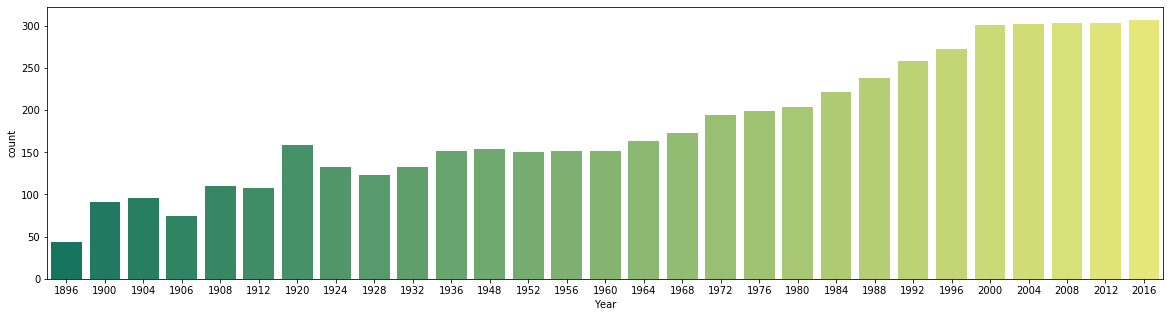

In [154]:
fig, x = plt.subplots(figsize=(20,5))
x = sns.countplot(data=EveSum, x='Year', palette='summer')

# How is male and female athlete participation comparable at both the Summer and Winter Olympics?

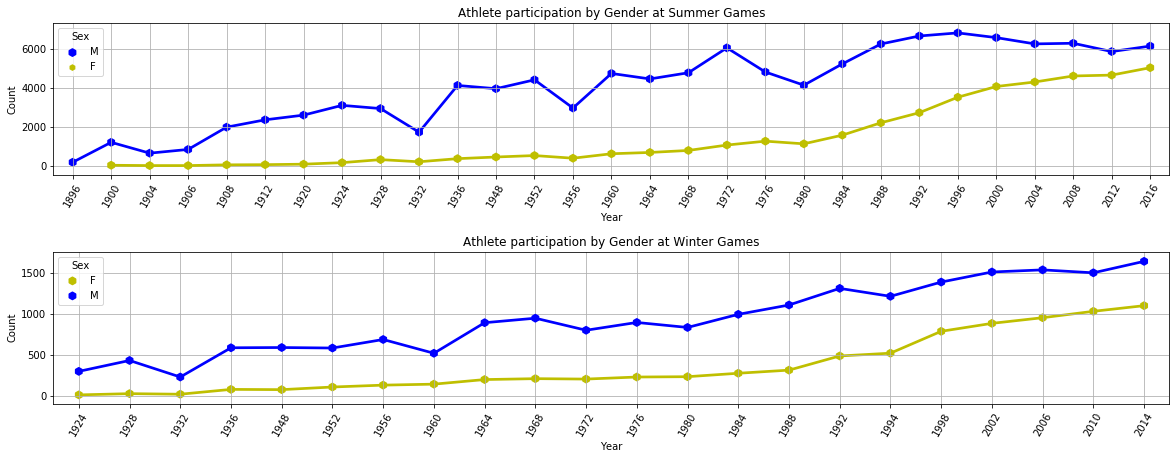

In [155]:
summer2 = summer.groupby(['Year', 'Sex'])['ID'].nunique().reset_index()
winter2 = winter.groupby(['Year', 'Sex'])['ID'].nunique().reset_index()

fig = plt.figure(figsize=(20,7))
plt.subplot(211)

ax = sns.pointplot(x = summer2['Year'], y=summer2['ID'], markers='h',
                   hue = summer2['Sex'], palette = ['b', 'y'])
plt.grid(True)
plt.xticks(rotation = 60)
plt.ylabel('Count')
plt.title("Athlete participation by Gender at Summer Games")


plt.subplot(212)
ax1 = sns.pointplot(x=winter2['Year'], y=winter2['ID'], markers='h',
                   hue= winter2['Sex'], palette = ['y', 'b'])

plt.grid(True)
plt.xticks(rotation = 60)
plt.ylabel('Count')
plt.title("Athlete participation by Gender at Winter Games")
plt.subplots_adjust(hspace = .5)

plt.show()

# How are the number of male an female events comparable at the Summer and Winter Olympics?

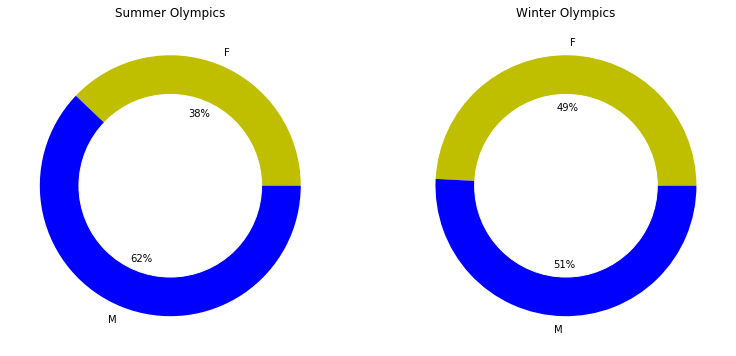

In [156]:
plt.figure(figsize=(13,6))


plt.subplot(121)
EveSum.groupby("Gender")["Event"].nunique().plot.pie(autopct = "%1.0f%%",
                                               colors = ["y","b"]) 
plt.ylabel("")
circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(circ)
plt.title("Summer Olympics")


plt.subplot(122)
EveWin.groupby("Gender")["Event"].nunique().plot.pie(autopct = "%1.0f%%",
                                               colors = ["y","b"]) 
plt.ylabel("")
circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(circ)
plt.title("Winter Olympics")

plt.show()

# Which Olympics is the closest to a 50/50 split among male and female athletes in the 21st Century?

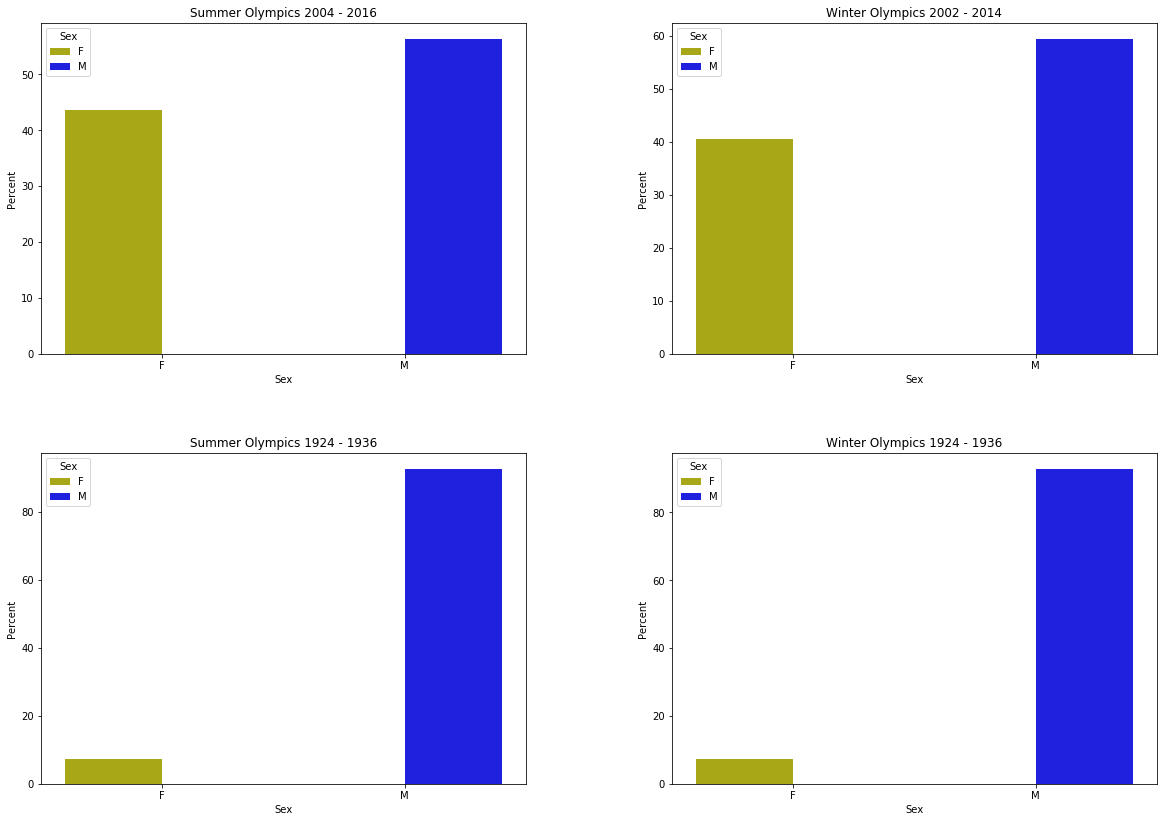

In [196]:
fig = plt.figure(figsize=(20,14))

plt.subplot(221)
ax = sns.barplot(x = last4S['Sex'], y=last4S['Percent'],
                   hue = last4S['Sex'], palette = ['y', 'b'])
    
plt.title("Summer Olympics 2004 - 2016")
plt.ylabel('Percent')


plt.subplot(222)
ax2 = sns.barplot(x = last4W['Sex'], y=last4W['Percent'],
                   hue = last4W['Sex'], palette = ['y', 'b'])
plt.title("Winter Olympics 2002 - 2014")


plt.subplot(223)
ax3 = sns.barplot(x = first4S['Sex'], y=first4S['Percent'],
                   hue = first4S['Sex'], palette = ['y', 'b'])
    
plt.title("Summer Olympics 1924 - 1936")
plt.ylabel('Percent')


plt.subplot(224)
ax3 = sns.barplot(x = first4W['Sex'], y=first4W['Percent'],
                   hue = first4W['Sex'], palette = ['y', 'b'])
    
plt.title("Winter Olympics 1924 - 1936")
plt.ylabel('Percent')

plt.subplots_adjust(hspace = .3, wspace = .3)
plt.show()